<a href="https://colab.research.google.com/github/segzy01/Oluwasegun-Durowoju-Prework/blob/master/ASS5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive with this code
from google.colab import drive
drive.mount('/content/drive')
#below where the file is in gdrive, change with yours
data_path = "/content/drive/My Drive/AI_764/"
###yearsBase, meanBase = np.loadtxt(data_path + 'file.csv', delimiter=',', unpack=True)

Mounted at /content/drive


###Import Library

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, Dense
from warnings import WarningMessage
from keras.layers import Dropout
WarningMessage

warnings.WarningMessage

###Get Data

In [3]:
import numpy as np
newData = np.genfromtxt('/content/drive/MyDrive/CellDNA (1).csv', delimiter = ',')
X, Raw_Y = np.split(newData, [-1], axis=1)    # split data into X and Y
Y = np.where(Raw_Y > 0, 1, 0) 
print(X[0])
print(Y)

[222.          31.18918919  40.34234234  35.57908668   8.88391697
   0.96832456 -80.11367302 222.           1.          16.81247093
   0.81617647   0.578125    78.591     ]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [4]:
print(X.shape, Y.shape)
print(X.ndim, Y.ndim)

(1217, 13) (1217, 1)
2 2


In [5]:
# Standardizing X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X[0])

[ 0.15952762 -1.80200559 -1.20813407  0.11441999 -0.13568869  0.53831071
 -1.58742636  0.13583286  0.23329249  0.32962609  0.34511514  0.65289142
 -0.00691284]


In [6]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=32)

In [7]:
# Convert array of labeled data to one-hot vector
from keras.utils.np_utils import to_categorical
CAT_Y_train = to_categorical(Y_train,2)
#print(CAT_Y_train)
CAT_Y_test = to_categorical(Y_test,2)
#print(CAT_Y_test)
print(CAT_Y_train.ndim, CAT_Y_train.ndim)
print(CAT_Y_test.ndim, CAT_Y_test.ndim)

2 2
2 2


In [8]:
model = Sequential()

model.add(Dense(14, input_dim=13, activation='relu'))

model.add(Dense(12, activation='relu'))

model.add(Dense(10, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(6, activation='relu'))

model.add(Dense(4, activation='relu'))

model.add(Dense(2,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                196       
                                                                 
 dense_1 (Dense)             (None, 12)                180       
                                                                 
 dense_2 (Dense)             (None, 10)                130       
                                                                 
 dense_3 (Dense)             (None, 8)                 88        
                                                                 
 dense_4 (Dense)             (None, 6)                 54        
                                                                 
 dense_5 (Dense)             (None, 4)                 28        
                                                                 
 dense_6 (Dense)             (None, 2)                 1

In [9]:
# Compile model
from tensorflow.keras.optimizers import SGD
sgdm = SGD(momentum = 0.0)  # 0.9 or 0.0
Compiled = model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'] )
#Compiled = model.compile(loss='binary_crossentropy', optimizer=sgdm, metrics=['accuracy'] )
# Fit the model
model.fit(X_train, CAT_Y_train, epochs=20,batch_size=20,verbose=1)

Epoch 1/20
49/49 [==============================] - 2s 2ms/step - loss: 0.7065 - accuracy: 0.5396
Epoch 2/20
49/49 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.8222
Epoch 3/20
49/49 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.8294
Epoch 4/20
49/49 [==============================] - 0s 3ms/step - loss: 0.5566 - accuracy: 0.8304
Epoch 5/20
49/49 [==============================] - 0s 2ms/step - loss: 0.4582 - accuracy: 0.8695
Epoch 6/20
49/49 [==============================] - 0s 3ms/step - loss: 0.3533 - accuracy: 0.8849
Epoch 7/20
49/49 [==============================] - 0s 3ms/step - loss: 0.2784 - accuracy: 0.8962
Epoch 8/20
49/49 [==============================] - 0s 4ms/step - loss: 0.2484 - accuracy: 0.9034
Epoch 9/20
49/49 [==============================] - 0s 3ms/step - loss: 0.2300 - accuracy: 0.9034
Epoch 10/20
49/49 [==============================] - 0s 3ms/step - loss: 0.2188 - accuracy: 0.9126
Epoch 11/20
49/49 [

In [10]:
from sklearn import metrics
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

# evaluate predictions from training
Y_score_train = model.predict(X_train, verbose=0)
Y_hat_train = np.argmax(Y_score_train, axis=-1)   # or... Y_hat_train = (Y_score_test > 0.5)
print("Confusion matrix: \n \n", confusion_matrix(Y_train, Y_hat_train))

Confusion matrix: 
 
 [[779  28]
 [ 34 132]]


In [11]:
# evaluate predictions from testing
Y_score_test = model.predict(X_test, verbose=0)
Y_hat_test = np.argmax(Y_score_test, axis=-1)   # or... Y_hat_test = (Y_score_test > 0.5)
print("Confusion matrix: \n \n", confusion_matrix(Y_test, Y_hat_test))

Confusion matrix: 
 
 [[198  12]
 [  9  25]]


In [12]:
import numpy as np
#Y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1])
#Yh = np.array([0, 0, 0, 1, 0, 1, 0, 1, 1])

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Prepare data (X, Y), build a model, and predict into Yh
acc_score = accuracy_score(Y_train, Y_hat_train)

print("\n", "Accuracy: ".format(format(acc_score,'.3f')))
print("\n", "CFM: \n", confusion_matrix(Y_train, Y_hat_train))
print("\n", "Classification report: \n", classification_report(Y_train, Y_hat_train))


 Accuracy: 

 CFM: 
 [[779  28]
 [ 34 132]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       807
           1       0.82      0.80      0.81       166

    accuracy                           0.94       973
   macro avg       0.89      0.88      0.89       973
weighted avg       0.94      0.94      0.94       973



In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example predictions and true labels
#y_pred = np.array([0.2, 0.4, 0.6, 0.8, 0.9, 0.3])
#y_true = np.array([0, 0, 1, 1, 1, 0])

# Compute false positive rate, true positive rate and threshold values
fpr, tpr, thresholds = roc_curve(Y_train, Y_hat_train)



In [20]:
# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)




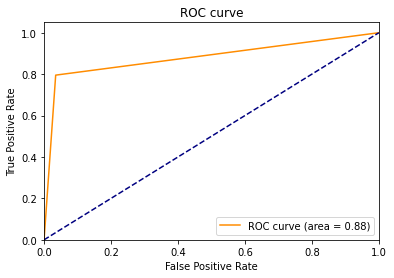

In [23]:
# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()